In [1]:
#import libraries

import math
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from sklearn.feature_selection import RFE
from datetime import datetime
import smtplib

# Create one random seed number for reproducible results
seedNum = 888

C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [146]:
#Timer
startTimeScript = datetime.now()

inputFile = 'OnlineNewsPopularity.csv'
xy_original = read_csv(inputFile)
xy_original.columns = xy_original.columns.str.replace(' ','')

# Dropping the two non-predictive attributes: url and timedelta
#saveurl=xy_original.iloc[:,0]
#xy_original.drop('url', axis=1, inplace=True)
xy_original.drop('timedelta', axis=1, inplace=True)

In [147]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(xy_original.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

In [148]:
# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

# Standardize the class column to the name of targetVar if the column name is known
xy_original.rename(columns={'shares': 'targetVar'}, inplace=True)

In [149]:
nf=pd.read_csv('validation.csv')
nf.columns = nf.columns.str.strip()

In [150]:
nf.drop(['id'],axis=1,inplace=True)
nf.drop(['url','timedelta'],axis=1,inplace=True)

In [151]:
nf.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,11,611,0.500000,1.0,0.591940,44,2,0,0,5.135843,...,0.100000,0.8,-0.299038,-0.75,-0.1875,0.233333,-0.250000,0.266667,0.250000,NaN
1,12,1302,0.459224,1.0,0.639949,28,5,5,8,4.570661,...,0.062500,1.0,-0.192460,-0.40,-0.0500,0.677273,0.468182,0.177273,0.468182,NaN
2,9,857,0.487242,1.0,0.642586,12,4,1,0,5.122520,...,0.033333,0.6,-0.141667,-0.25,-0.1000,0.000000,0.000000,0.500000,0.000000,NaN
3,11,43,0.930233,1.0,0.966667,2,1,0,1,5.209302,...,0.250000,0.5,-0.800000,-1.00,-0.6000,0.000000,0.000000,0.500000,0.000000,NaN
4,10,394,0.558673,1.0,0.764706,8,1,1,0,4.421320,...,0.050000,1.0,-0.209414,-0.50,-0.0250,1.000000,0.000000,0.500000,0.000000,NaN


In [152]:
# We create training datasets (xy_train, x_train, y_train) for various operations
# We create validation datasets (xy_test, x_test, y_test) for various operations
# Use 70% of the data to train the models and the remaining for testing/validation
#array = xy_original.values

if targetCol == totCol :
    x_original = xy_original.iloc[:,0:totAttr]
    y_original = xy_original.iloc[:,totAttr]
else :
    x_original = xy_original.iloc[:,1:totCol]
    y_original = xy_original.iloc[:,0]

validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_original, y_original, test_size=validation_size, random_state=seedNum)
saveurl_xtrain=x_train.iloc[:,0]
saveurl_xtest=x_test.iloc[:,0]
x_train.drop('url', axis=1, inplace=True)
x_test.drop('url', axis=1, inplace=True)

print("x_original.shape: {} y_original.shape: {}".format(x_original.shape, y_original.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_original.shape: (39644, 59) y_original.shape: (39644,)
x_train.shape: (27750, 58) y_train.shape: (27750,)
x_test.shape: (11894, 58) y_test.shape: (11894,)


C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [153]:
x_test.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
29134,11.0,351.0,0.551320,1.0,0.701923,8.0,2.0,1.0,1.0,4.589744,...,0.277879,0.10,1.00,-0.121944,-0.1875,-0.05,0.000,0.00,0.500,0.00
22452,9.0,1742.0,0.454708,1.0,0.641706,53.0,8.0,21.0,1.0,4.619403,...,0.380601,0.10,1.00,-0.283812,-0.8000,-0.10,0.375,0.25,0.125,0.25
8981,12.0,160.0,0.707006,1.0,0.849462,3.0,1.0,0.0,0.0,4.868750,...,0.313889,0.10,0.85,0.000000,0.0000,0.00,0.000,0.00,0.500,0.00
36537,12.0,415.0,0.585427,1.0,0.757085,5.0,3.0,1.0,0.0,4.934940,...,0.241000,0.05,0.60,-0.300000,-0.6000,-0.10,0.000,0.00,0.500,0.00
16578,8.0,557.0,0.502703,1.0,0.733788,11.0,7.0,1.0,0.0,4.473968,...,0.485965,0.20,0.90,-0.246296,-0.5000,-0.05,0.000,0.00,0.500,0.00


In [154]:
y_test.head()

29134     764
22452     928
8981     2200
36537    1500
16578    2300
Name: targetVar, dtype: int64

In [155]:
saveurl_xtest.head()

29134    http://mashable.com/2014/07/17/marvels-next-ca...
22452    http://mashable.com/2014/03/26/mudslide-vigil-tk/
8981     http://mashable.com/2013/06/26/celebrity-super...
36537       http://mashable.com/2014/11/09/digital-nomads/
16578          http://mashable.com/2013/11/24/cancer-bees/
Name: url, dtype: object

In [156]:
xy_original.drop('url', axis=1, inplace=True)

In [157]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

In [158]:
xy_original.head(10)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,targetVar
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,4.855670,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,5.090909,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [159]:
xy_original.shape

(39644, 59)

In [160]:
xy_original.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

In [161]:
xy_original.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,targetVar
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [162]:
xy_original.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

In [163]:
x_original = xy_original.drop(columns=['targetVar'])

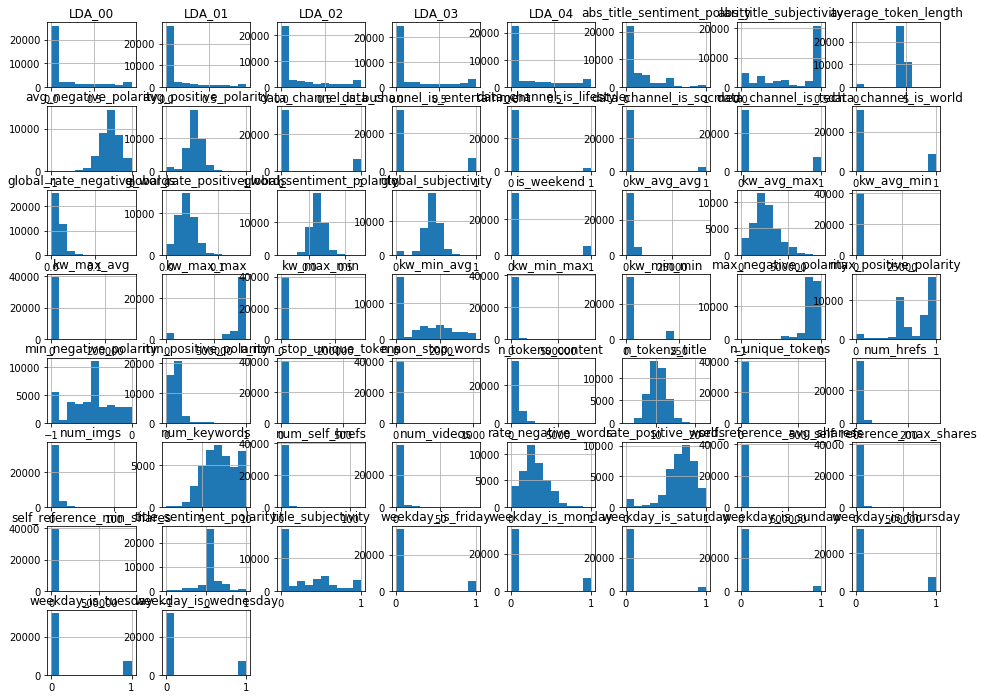

In [164]:
# Histograms for each attribute
x_original.hist()
pyplot.show()

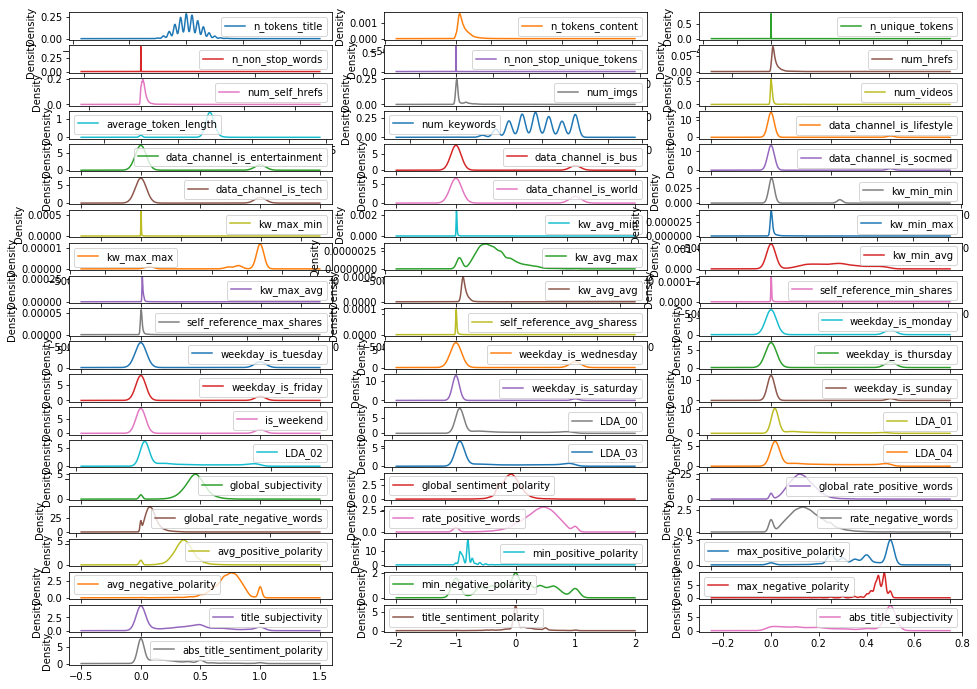

In [165]:
# Density plot for each attribute
x_original.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

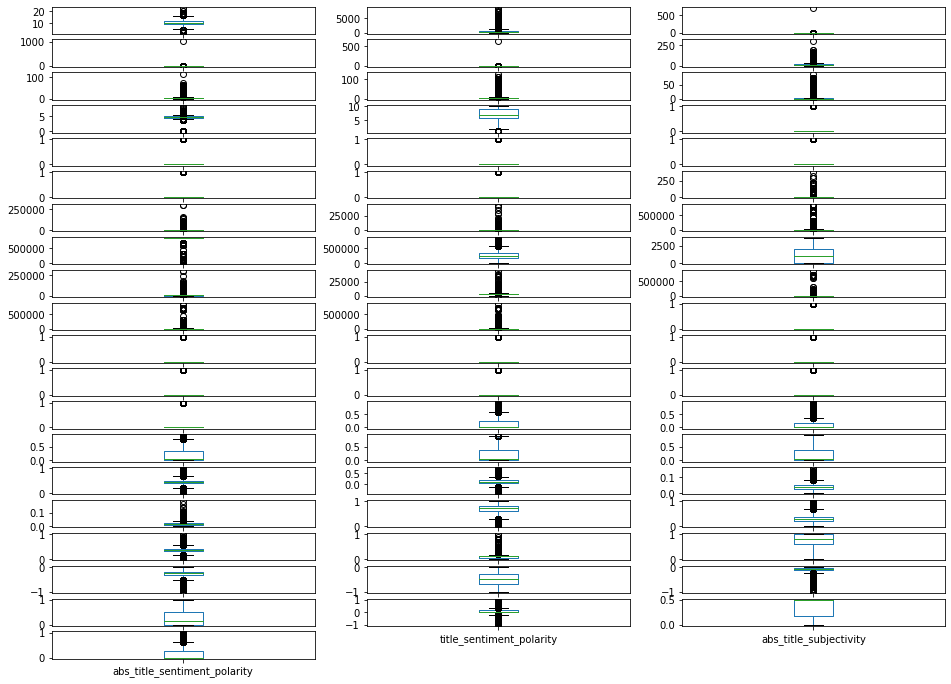

In [166]:
# Box and Whisker plot for each attribute
x_original.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

In [167]:
# Scatterplot matrix
# scatter_matrix(x_original)
# pyplot.show()

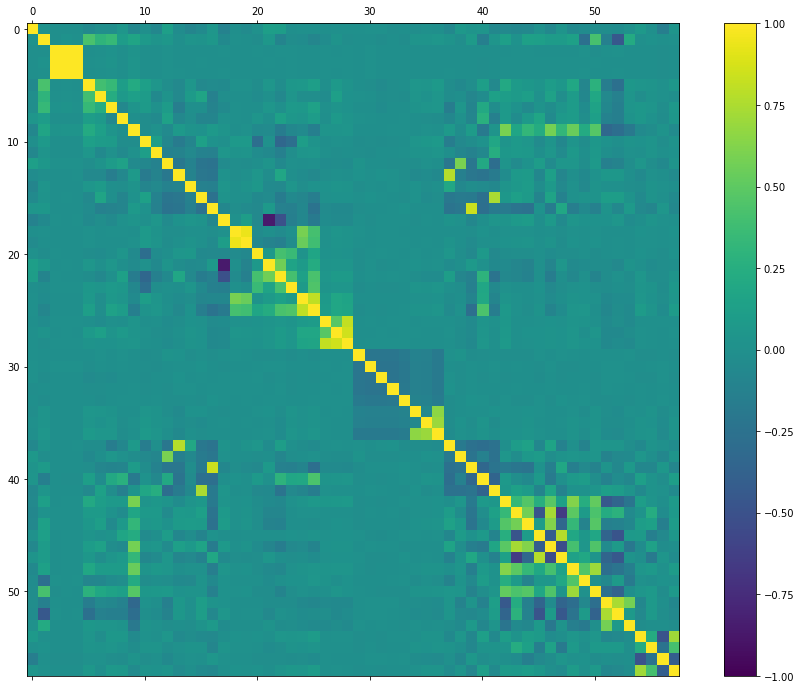

In [168]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x_original.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [169]:
# Feature Importance with Lasso
model = Lasso()
model.fit(x_train, y_train)

importanceScore = abs(model.coef_)
attributeList = xy_original.columns
attributeList = xy_original.columns.tolist()
if targetCol == totCol :
    del attributeList[-1]
else :
    del attributeList[0]
attributeImportance = pd.DataFrame({'attribute': attributeList, 'importance': importanceScore})
rankedAttributes = attributeImportance.sort_values('importance', ascending=False)
print(rankedAttributes)

                        attribute   importance
44     global_rate_positive_words  5560.044402
42            global_subjectivity  1960.220681
49          min_positive_polarity  1436.755471
53          max_negative_polarity  1393.310243
12  data_channel_is_entertainment   890.797146
56         abs_title_subjectivity   786.747698
39                         LDA_02   740.324597
34            weekday_is_saturday   704.933289
52          min_negative_polarity   692.263774
11      data_channel_is_lifestyle   621.250700
29              weekday_is_monday   586.571370
57   abs_title_sentiment_polarity   510.360826
4        n_non_stop_unique_tokens   396.532412
38                         LDA_01   389.260894
43      global_sentiment_polarity   365.449330
9            average_token_length   348.304931
46            rate_positive_words   277.341919
3                n_non_stop_words   273.912941
48          avg_positive_polarity   245.986012
55       title_sentiment_polarity   230.748392
15           

C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1737516797334.6924, tolerance: 359727713.3772505
  positive)


In [170]:
# Set the importance threshold and calculate the list of attributes that don't contribute to the importance threshold
importanceSum = sum(importanceScore)
maxThreshold = 0.99
i = 0
accumWeight = 0
exit_now = False
while ((i < totAttr) and (not exit_now)) :
    accumWeight = accumWeight + (rankedAttributes.iloc[i]['importance']/importanceSum)
    if (accumWeight >= maxThreshold) :
        exit_now = True
    else :
        i = i + 1
print('Number of attributes contributed to the importance threshold:'+str(i))
lowAttributes = rankedAttributes.iloc[(i):(totAttr),]['attribute'].tolist()
print('Number of attributes found to be of low importance:',len(lowAttributes))
print(lowAttributes)

Number of attributes contributed to the importance threshold:30
Number of attributes found to be of low importance: 28
['num_self_hrefs', 'weekday_is_wednesday', 'num_videos', 'title_subjectivity', 'num_imgs', 'num_hrefs', 'rate_negative_words', 'LDA_00', 'weekday_is_tuesday', 'kw_min_min', 'kw_avg_avg', 'kw_avg_min', 'kw_min_avg', 'kw_max_avg', 'n_tokens_content', 'kw_max_min', 'self_reference_min_shares', 'self_reference_avg_sharess', 'kw_min_max', 'kw_avg_max', 'kw_max_max', 'self_reference_max_shares', 'max_positive_polarity', 'avg_negative_polarity', 'global_rate_negative_words', 'LDA_04', 'weekday_is_friday', 'weekday_is_sunday']


In [171]:
# Removing the unselected attributes from the training and validation dataframes
#xy_train <- xy_train[, !(names(xy_train) %in% lowAttributes)]
#xy_test <- xy_test[, !(names(xy_test) %in% lowAttributes)]
xy_newdf = xy_original.drop(lowAttributes, axis=1)

totCol = len(xy_newdf.columns)
totAttr = totCol-1
targetCol = totCol
array = xy_newdf.values

if targetCol == totCol :
    x_newdf = array[:,0:totAttr]
    y_newdf = array[:,totAttr]
else :
    x_newdf = array[:,1:totCol]
    y_newdf = array[:,0]

validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_newdf, y_newdf, test_size=validation_size, random_state=seedNum)
print("x_newdf.shape: {} y_newdf.shape: {}".format(x_newdf.shape, y_newdf.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_newdf.shape: (39644, 30) y_newdf.shape: (39644,)
x_train.shape: (27750, 30) y_train.shape: (27750,)
x_test.shape: (11894, 30) y_test.shape: (11894,)


In [172]:
y_test

array([ 764.,  928., 2200., ..., 1000., 2800., 4200.])

In [173]:
print('Data handling time:',(datetime.now() - startTimeScript))

Data handling time: 0:02:57.990539


In [174]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [175]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LinearRegression()))
models.append(('RR', Ridge(random_state=seedNum)))
models.append(('LASSO', Lasso(random_state=seedNum)))
models.append(('EN', ElasticNet(random_state=seedNum)))
models.append(('CART', DecisionTreeRegressor(random_state=seedNum)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor(random_state=seedNum)))
models.append(('GBM', GradientBoostingRegressor(random_state=seedNum)))
results = []
names = []
metrics = []

In [176]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))

C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: -174487497.846367 (186729549.987321)
Model training time: 0:00:00.295104
RR: -155780972.809399 (133909992.971492)
Model training time: 0:00:00.143615


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1204403960406.5908, tolerance: 327428784.38258
  positive)
C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the 

LASSO: -149581910.802585 (117102626.609564)
Model training time: 0:00:03.576468
EN: -129014359.009228 (66346526.401247)
Model training time: 0:00:00.556512


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: -271480773.013189 (111433998.224939)
Model training time: 0:00:06.491542


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: -154846018.642096 (63736384.131479)
Model training time: 0:00:07.001377


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: -133500915.401566 (66355742.875657)
Model training time: 0:05:54.317676


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: -139005297.880020 (66697576.530330)
Model training time: 0:06:33.835045


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBM: -130023130.075304 (65707853.772243)
Model training time: 0:01:26.935974


In [177]:
print('Average metrics ('+scoring+') from all models:',np.mean(metrics))
print('Average error from all models:',math.sqrt(abs(np.mean(metrics))))

Average metrics (neg_mean_squared_error) from all models: -159746763.94219485
Average error from all models: 12639.096642647957


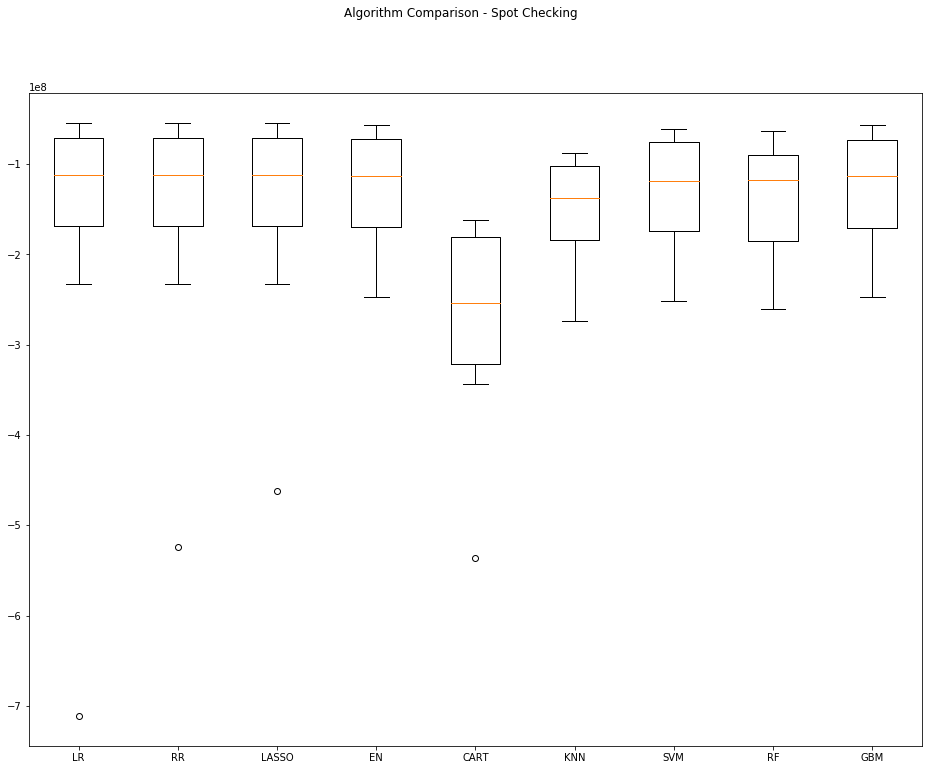

In [178]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



In [179]:
# Set up the comparison array
results = []
names = []

In [180]:
# Tuning algorithm #1 - ElasticNet
startTimeModule = datetime.now()
paramGrid1 = dict(alpha=np.array([1,2,3]))
model1 = ElasticNet(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('EN')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print ('Model training time:',(datetime.now() - startTimeModule))

C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -129014359.009228 using {'alpha': 1}
-129014359.009228 (66346526.401247) with: {'alpha': 1}
-129240686.741656 (66325776.907726) with: {'alpha': 2}
-129334149.561990 (66298769.702133) with: {'alpha': 3}
Model training time: 0:00:01.430990


In [35]:
# Tuning algorithm #2 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=np.array([100,200,300,400]))
model2 = GradientBoostingRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print ('Model training time:',(datetime.now() - startTimeModule))

C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -130023130.075304 using {'n_estimators': 100}
-130023130.075304 (65707853.772243) with: {'n_estimators': 100}
-132820677.809819 (66304773.985985) with: {'n_estimators': 200}
-135532038.477313 (67860137.943873) with: {'n_estimators': 300}
-137854283.739144 (68486142.027024) with: {'n_estimators': 400}
Model training time: 0:41:20.997323


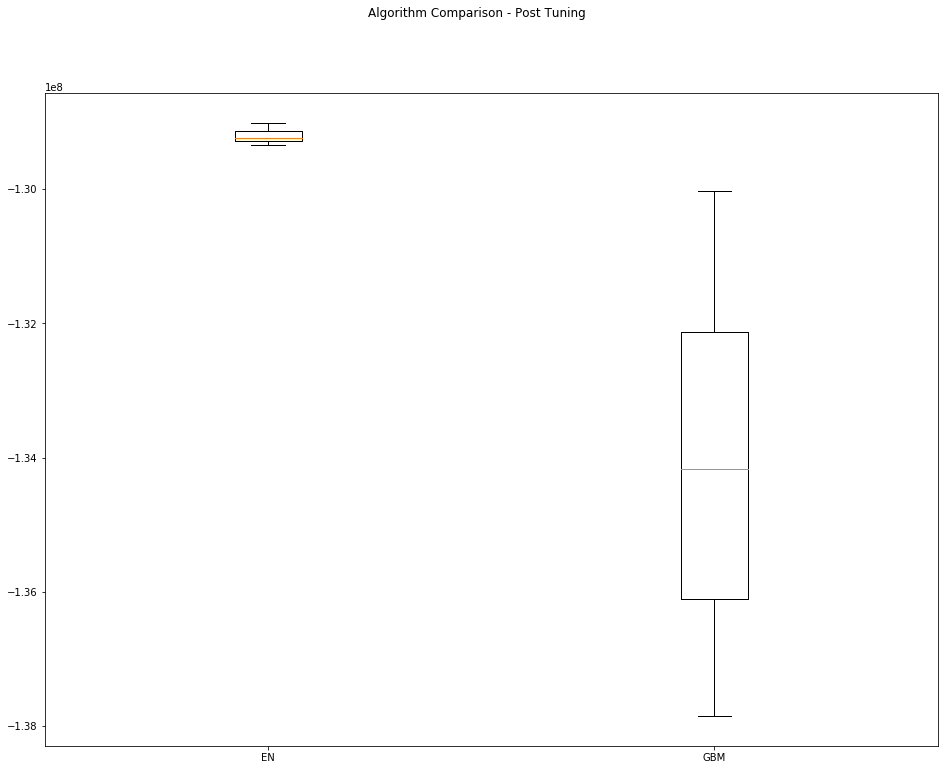

In [36]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



In [181]:
model = ElasticNet(alpha=1, random_state=seedNum)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(mean_squared_error(y_test, predictions))

147525845.6885829


In [182]:
startTimeModule = datetime.now()
finalModel = ElasticNet(alpha=1, random_state=seedNum)
finalModel.fit(x_original, y_original)
print('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:00.489691


In [183]:
modelName = 'finalModel_BinaryClass.sav'
dump(finalModel, modelName)


print('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:27:10.165568


In [184]:
predictions

array([2907.30305013, 3622.01858809, 3267.04072145, ..., 3020.14873767,
       4448.96683572, 3411.25523777])

In [185]:
predictions.shape

(11894,)

In [195]:
import csv
share_count = 0

with open('sample_submission.csv', 'w', newline='') as csvfile:
    
    fieldnames = ['id','shares','url']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    
    for shares in predictions:
        share_count += 1
        thewriter.writerow({'id':share_count, 'shares':shares})
        
    for urls in saveurl_xtest:
        thewriter.writerow({'url':urls})

In [188]:
saveurl_xtest

29134    http://mashable.com/2014/07/17/marvels-next-ca...
22452    http://mashable.com/2014/03/26/mudslide-vigil-tk/
8981     http://mashable.com/2013/06/26/celebrity-super...
36537       http://mashable.com/2014/11/09/digital-nomads/
16578          http://mashable.com/2013/11/24/cancer-bees/
                               ...                        
9609     http://mashable.com/2013/07/09/google-plus-upd...
470      http://mashable.com/2013/01/15/google-glass-de...
5803     http://mashable.com/2013/04/23/spacex-grasshop...
39372    http://mashable.com/2014/12/22/de-blasio-speak...
39081    http://mashable.com/2014/12/17/bright-colors-p...
Name: url, Length: 11894, dtype: object